In [1]:
import re
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import fileupload
import io
import sys

In [2]:
class Text_File():
    def __init__(self, filepath):
        self.filepath = filepath
        self.text = ''
        self.wordcount = {}
        self.name = self.filepath[filepath.rfind('/')+1:-4]
        self.word_cloud = {}
        
        # Not sure how the grading works so I skipped the is_gutenberg() fn and just passed True
        self.gutenberg = True
        lines = open(self.filepath).readlines()
        for line in lines[23:]:
            self.text += line
        
        """if self.gutenberg == True:
            for line in lines[23:]:
                self.text += line
        else:
            for line in lines:
                self.text += line"""
        
    
    def is_gutenberg(self):
        answer = input("Is this a project gutenberg text file? (y/n)")
        if answer.lower() == 'y':
            return True
        elif answer.lower() == 'n':
            return False
        else:
            return self.is_gutenberg()
    
    def clean_text(self):
        """ Takes the book text and removes non-alpha characters using regex.
        Then removes all uninteresting words and checks spacy stopwords for additional screening.
        Then adds the self.no_stopwords which is a list of words"""
        clean = re.sub(r"[^a-zA-Z']", r" ", self.text).lower()
        for char in clean:
            if char.isalpha() == False:
                del char
        uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my",
        "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them",
        "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being",
        "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how",
        "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
        
        self.words = clean.split()
        sp = spacy.load('en_core_web_sm')
        all_stopwords = sp.Defaults.stop_words
        
        self.no_stopwords = [word for word in self.words if not word in all_stopwords]
        self.no_stopwords = [word for word in self.no_stopwords if not word in uninteresting_words]
        print("The text has been stripped of punctuation and split into a list of words.")
        
    def number_of_words(self):
        self.total_significant_words = len(self.no_stopwords)
        print(f"Total Word Count: {self.total_significant_words}")
    
    def count_uniques(self):
        if not self.no_stopwords:
            print("Text has not been cleaned yet.")
            return
        disordered = {}
        for word in self.no_stopwords:
            if word not in disordered.keys():
                disordered[word] = 1
            else:
                disordered[word] += 1
        
        # Found it easier initially to get list of tuples with words and frequencies
        # Likely easier to just use the wordcloud.WordCloud method to select highest frequencies
        self.wordcount = sorted(zip(disordered.values(), disordered.keys()), reverse=True)
        print("Unique words have been counted.")
    
    def word_cloud_words(self):
        word_cloud_tuples = self.wordcount[:100]
        for item in word_cloud_tuples:
            self.word_cloud[item[1]] = item[0]
    
    def makeImage(self):
        # generate word cloud
        wc = WordCloud(background_color='black', width=1000, height=1000, relative_scaling=1).generate_from_frequencies(self.word_cloud)

        # show
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()


FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [3]:
path = "C:/Users/mezzo/Documents/Jupyter/Beyond Good and Evil.txt"
book = Text_File(path)

In [4]:
book.clean_text()
book.number_of_words()

The text has been stripped of punctuation and split into a list of words.
Total Word Count: 28439


In [5]:
book.count_uniques()

Unique words have been counted.


In [6]:
book.word_cloud_words()

In [7]:
print(book.wordcount)

[(236, 'man'), (140, 'good'), (124, 'men'), (108, 'like'), (101, 'new'), (96, 'german'), (92, 'self'), (91, 'life'), (90, 'morality'), (89, 'soul'), (88, 'time'), (88, 'gutenberg'), (84, 'project'), (83, 'great'), (82, 'woman'), (82, 'love'), (81, 'world'), (80, 'spirit'), (80, 'old'), (75, 'taste'), (73, 'things'), (73, 'people'), (72, 'work'), (69, 'long'), (67, 'philosophy'), (67, 'means'), (67, 'let'), (67, 'fact'), (67, 'europe'), (66, 'hitherto'), (65, 'god'), (65, 'free'), (64, 'power'), (63, 'moral'), (62, 'philosophers'), (62, 'know'), (61, 'far'), (59, 'truth'), (59, 'nature'), (58, 'philosopher'), (58, 'conscience'), (57, 'present'), (56, 'tm'), (56, 'sense'), (56, 'noble'), (55, 'kind'), (54, 'order'), (52, 'precisely'), (51, 'sympathy'), (51, 'right'), (49, 'higher'), (49, 'dangerous'), (48, 'end'), (47, 'knowledge'), (46, 'instinct'), (46, 'heart'), (46, 'art'), (45, "one's"), (45, 'instance'), (45, 'best'), (44, 'nowadays'), (43, 'way'), (43, 'general'), (43, 'certain'),

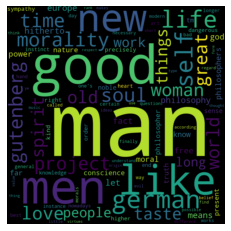

In [8]:
book.makeImage()